In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf

In [19]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


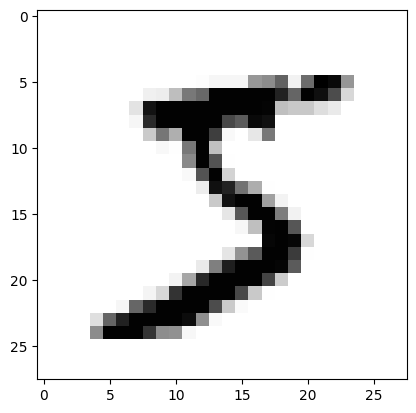

In [20]:
import matplotlib.pyplot as plt

# 그래프로 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [21]:
# 픽셀로 확인
for x in X_train[0]:
    for i in x :
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [22]:
# 28 * 28 2차원 데이터를 784개의 1차원 데이터로 바꿔주면 784개의 속성으로 이용가능하다
# 차원 변환 과정 (2차원 -> 1차원)
X_train = X_train.reshape(X_train.shape[0], 784)

In [23]:
# keras는 데이터가 0~1 사이 값일 때 최적의 성능으로 예측함
# 데이터 정규화(normalization) : 255로 나눠준다
X_train = X_train.astype('float64') # 현재 정수형이므로 실수형으로 바꾼 후 정규화 실행
X_train = X_train / 255

# 테스트 셋에도 정규화 작업
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') /255

In [24]:
# 클래스 값 확인
print('class : %d' % (Y_class_train[0]))

# 현재 클래스를 0~9 정수값에서 0 or 1인 벡터로 수정해야 함
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os

In [26]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

# 데이터 차원 축소, 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') /255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') /255

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [27]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
# 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
Checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',\
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [29]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, Checkpointer])


Epoch 1: val_loss improved from inf to 0.14875, saving model to ./model\01-0.1488.hdf5

Epoch 2: val_loss improved from 0.14875 to 0.10114, saving model to ./model\02-0.1011.hdf5

Epoch 3: val_loss improved from 0.10114 to 0.08579, saving model to ./model\03-0.0858.hdf5

Epoch 4: val_loss improved from 0.08579 to 0.07745, saving model to ./model\04-0.0774.hdf5

Epoch 5: val_loss improved from 0.07745 to 0.07244, saving model to ./model\05-0.0724.hdf5

Epoch 6: val_loss improved from 0.07244 to 0.06677, saving model to ./model\06-0.0668.hdf5

Epoch 7: val_loss improved from 0.06677 to 0.06381, saving model to ./model\07-0.0638.hdf5

Epoch 8: val_loss improved from 0.06381 to 0.06103, saving model to ./model\08-0.0610.hdf5

Epoch 9: val_loss did not improve from 0.06103

Epoch 10: val_loss improved from 0.06103 to 0.06006, saving model to ./model\10-0.0601.hdf5

Epoch 11: val_loss did not improve from 0.06006

Epoch 12: val_loss did not improve from 0.06006

Epoch 13: val_loss improved 

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

313/313 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9829

 Test Accuracy : 0.9829


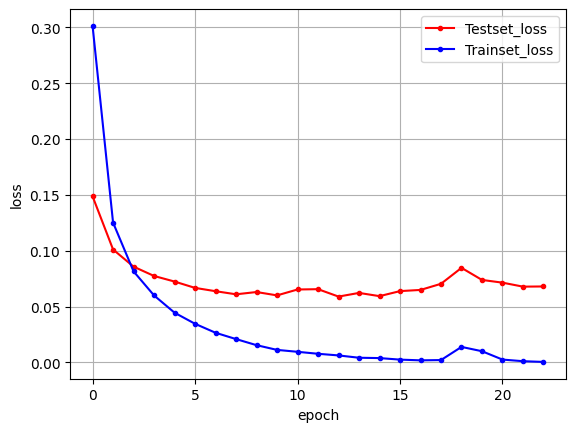

In [31]:
# 모델 실행 과정 그래프로 확인하기

# 테스트 정확도 출력
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()